Scenario 3:
A hospital has a large dataset of patient records, including information on demographics,
medical history, diagnoses, treatments, and outcomes. The hospital wants to use this data
to develop a machine learning model that can predict the risk of readmission for patients
after they are discharged from the hospital. Develop a ML solution for the aforesaid
prediction with an example Dataset.

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries and loading dataset from drive



In [68]:
# Import the necessary libraries for data visualization, machine learning, and evaluation
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns  # Seaborn for enhanced data visualization

# Import a function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import machine learning models for classification tasks
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier model

# Import a preprocessing tool to standardize features
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature scaling

# Import libraries for model evaluation and metrics
from sklearn import metrics  # General library for machine learning metrics
from sklearn.metrics import confusion_matrix  # Confusion matrix for model evaluation
from sklearn.metrics import accuracy_score  # Accuracy score metric

#Dataset Description:

The dataset contains various attributes related to patient encounters in a healthcare setting. Here are the attributes along with their data types and descriptions:

Encounter ID (Numeric): A unique identifier for each patient encounter.

Patient Number (Numeric): A unique identifier for each patient.

Race (Nominal): Values can be Caucasian, Asian, African American, Hispanic, or other.

Gender (Nominal): Values can be male, female, or unknown/invalid.

Age (Nominal): Age grouped into 10-year intervals (e.g., [0, 10), [10, 20), ..., [90, 100)).

Weight (Numeric): Weight in pounds.

Admission Type (Nominal): An integer identifier corresponding to 9 distinct values (e.g., emergency, urgent, elective).

Discharge Disposition (Nominal): An integer identifier corresponding to 29 distinct values (e.g., discharged to home, expired).

Admission Source (Nominal): An integer identifier corresponding to 21 distinct values (e.g., physician referral, emergency room).

Time in Hospital (Numeric): Integer number of days between admission and discharge.

Payer Code (Nominal): An integer identifier corresponding to 23 distinct values (e.g., Blue Cross/Blue Shield, Medicare).

Medical Specialty (Nominal): An integer identifier for the specialty of the admitting physician, corresponding to 84 distinct values (e.g., cardiology, internal medicine).

Number of Lab Procedures (Numeric): Number of lab tests performed during the encounter.

Number of Procedures (Numeric): Number of procedures (other than lab tests) performed during the encounter.

Number of Medications (Numeric): Number of distinct generic names administered during the encounter.

Number of Outpatient Visits (Numeric): Number of outpatient visits of the patient in the year preceding the encounter.

Number of Emergency Visits (Numeric): Number of emergency visits of the patient in the year preceding the encounter.

Number of Inpatient Visits (Numeric): Number of inpatient visits of the patient in the year preceding the encounter.

Diagnosis 1 (Nominal): The primary diagnosis, coded as the first three digits of ICD9, with 848 distinct values.

Diagnosis 2 (Nominal): Secondary diagnosis, coded as the first three digits of ICD9, with 923 distinct values.

Diagnosis 3 (Nominal): Additional secondary diagnosis, coded as the first three digits of ICD9, with 954 distinct values.

Number of Diagnoses (Numeric): Number of diagnoses entered into the system.

Glucose Serum Test Result (Nominal): Indicates the range of the result or if the test was not taken (values: ">200," ">300," "normal," "none").

A1c Test Result (Nominal): Indicates the range of the result or if the test was not taken (values: ">8," ">7," "normal," "none").

Change of Medications (Nominal): Indicates if there was a change in diabetic medications (values: "change" and "no change").

Diabetes Medications (Nominal): Indicates if any diabetic medication was prescribed (values: "yes" and "no").

24 Features for Medications (Nominal): For various generic names of drugs, it indicates whether the drug was prescribed or if there was a change in dosage (values: "up," "down," "steady," "no").

Target Variable:

Readmitted (Nominal): Days to inpatient readmission. Values: "<30" if the patient was readmitted in less than 30 days, ">30" if the patient was readmitted after 30 days, and "NO" if the patient was not readmitted.

In [10]:
df = pd.read_csv("/content/drive/MyDrive/DRDO dataset/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
df = df.replace("?",np.nan)
len(df.select_dtypes('O').columns)

37

#PREPROCESSING AND EDA


In [12]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

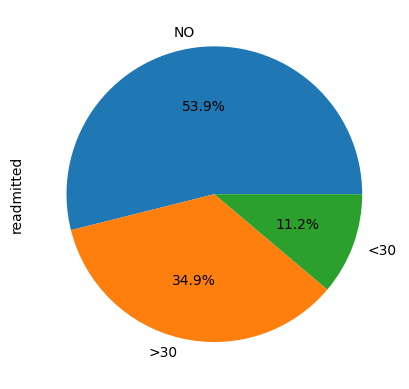

In [14]:
# Calculate the value counts of 'readmitted' and their relative frequencies
counts = df['readmitted'].value_counts()  # Count the occurrences of each unique value
percentages = counts * 100 / len(df)  # Calculate the percentage of each value relative to the total data

# Create a pie chart to visualize the distribution of 'readmitted' values
fig, ax = plt.subplots()  # Create a new figure and axis
percentages.plot(kind='pie', ax=ax, autopct='%1.1f%%')  # Create a pie chart with percentages and display it
plt.show()  # Show the pie chart

In [15]:
df.isnull().sum()[df.isnull().sum()>1]/len(df)*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

In [16]:
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

<ipython-input-53-dbb1b8e89f1b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")


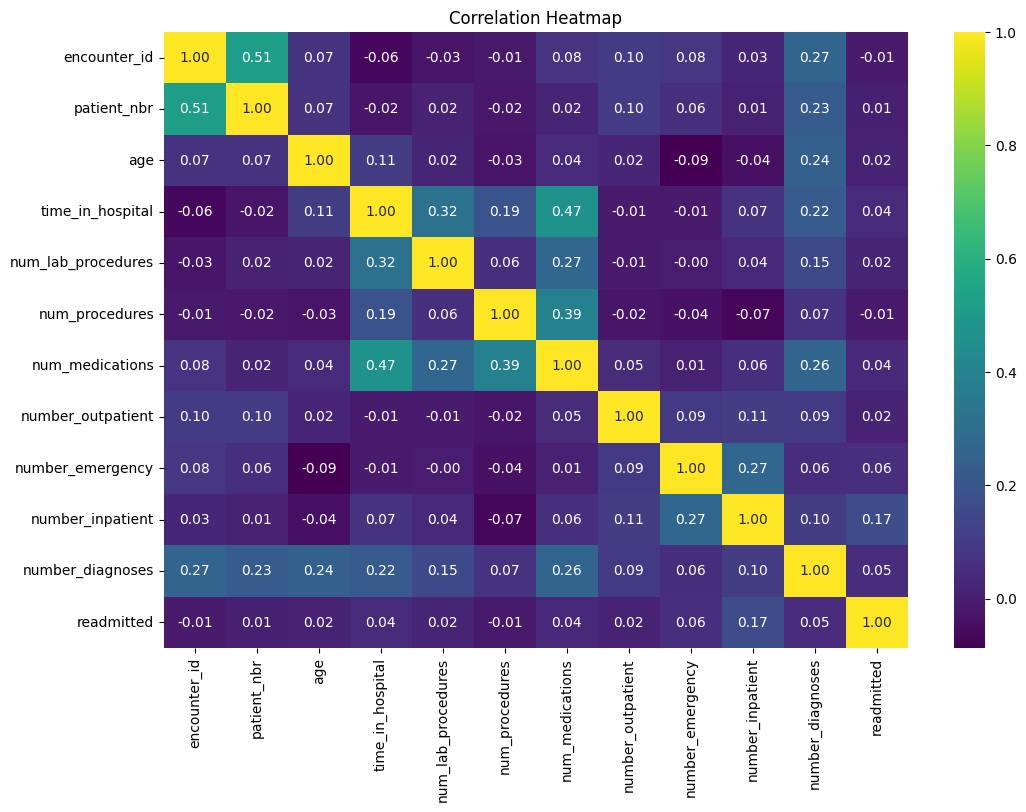

In [53]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation matrix of your DataFrame
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()

In [17]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

0    90406
1    11357
Name: readmitted, dtype: int64


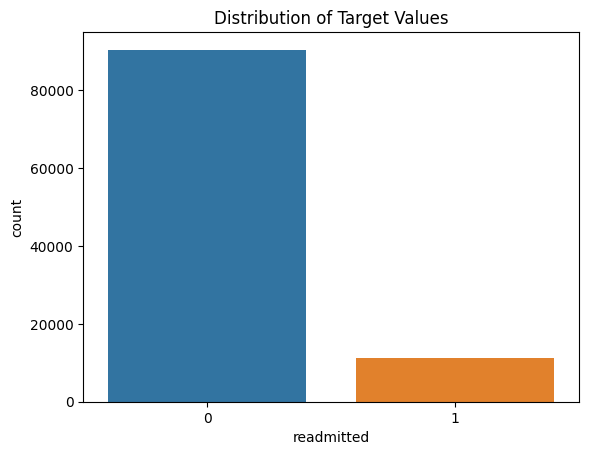

In [55]:
# Replace values in the 'readmitted' column with numerical values (0 and 1)
df = df.replace({"NO": 0, "<30": 1, ">30": 0})

# Print the value counts of the 'readmitted' column after replacement
print(df.readmitted.value_counts())

# Create a countplot to visualize the distribution of target values in the 'readmitted' column
sns.countplot(x="readmitted", data=df)  # Create a countplot using Seaborn
plt.title("Distribution of Target Values")  # Set the title for the plot
plt.show()  # Display the countplot


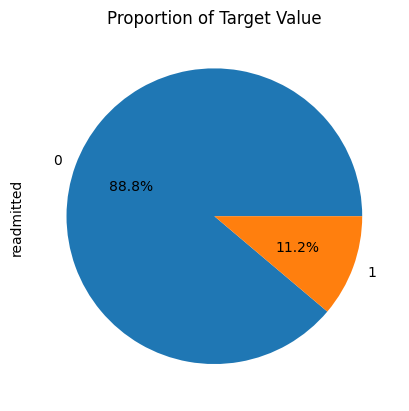

In [56]:
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

Proportion of Race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64


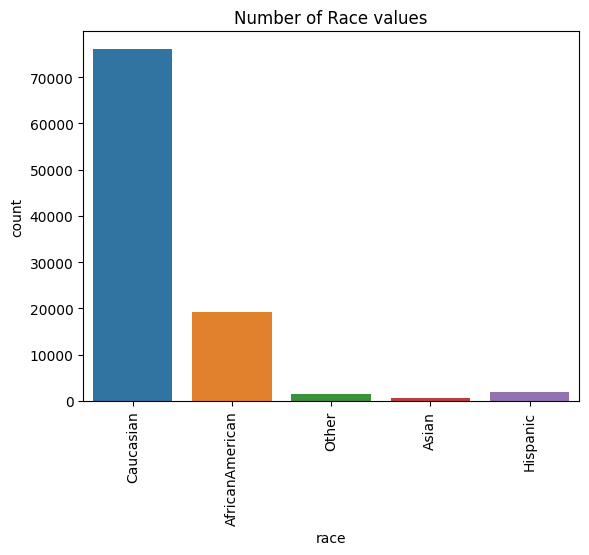

In [19]:
# Print the proportion of each 'race' category in the DataFrame
print("Proportion of Race")
print(df.race.value_counts(normalize=True) * 100)
# Create a countplot to visualize the distribution of 'race' values in the DataFrame
sns.countplot(x=df.race, data=df)  # Create a countplot using Seaborn
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.title("Number of Race values")  # Set the title for the plot
plt.show()  # Display the countplot

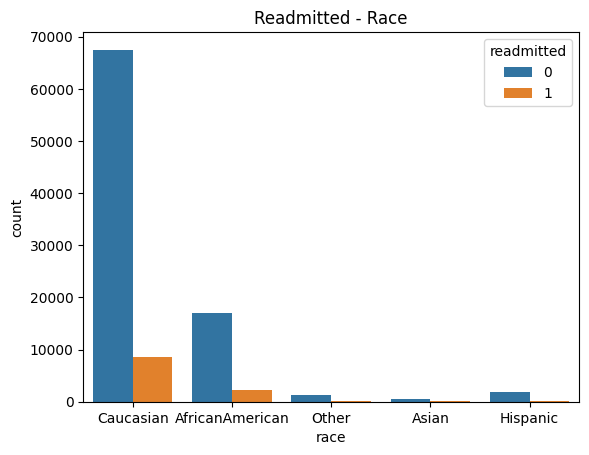

In [20]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

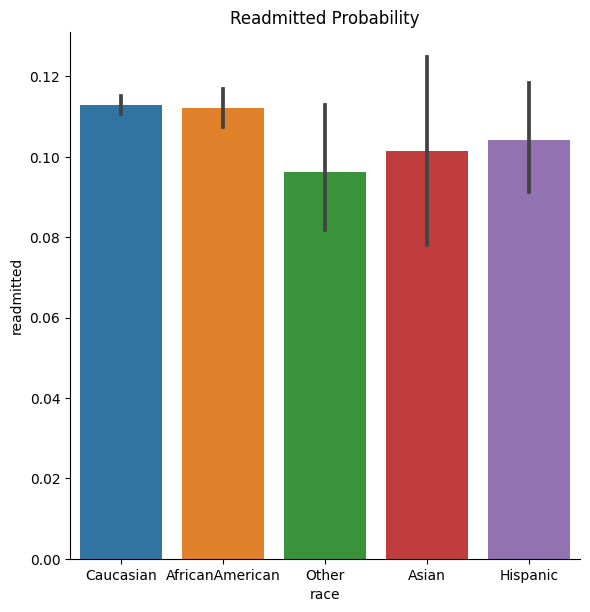

In [21]:
sns.catplot(x = "race", y = "readmitted",data = df, kind = "bar", height= 6)
plt.title("Readmitted Probability")
plt.show()

Proportions of Race Value
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


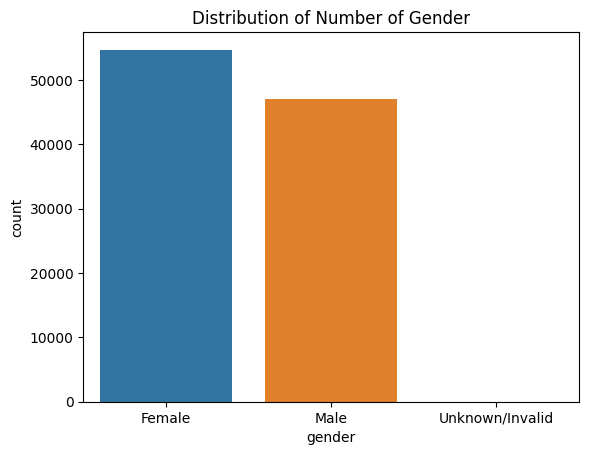

In [22]:
print("Proportions of Race Value")
print(df.gender.value_counts(normalize = True))

sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()


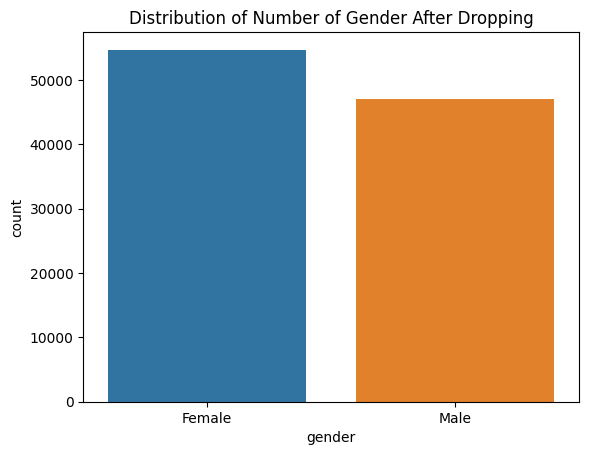

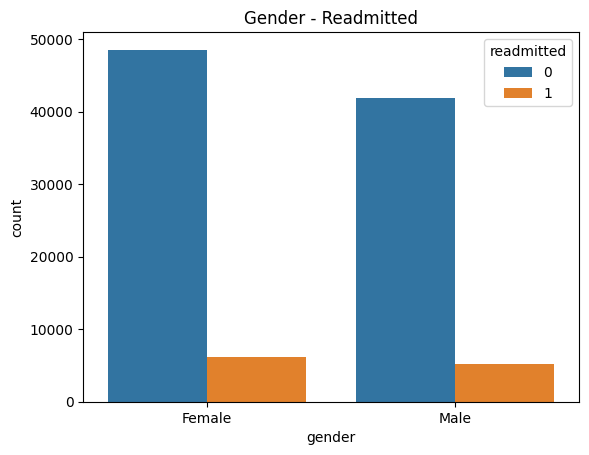

In [23]:
df = df.drop(df.loc[df["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

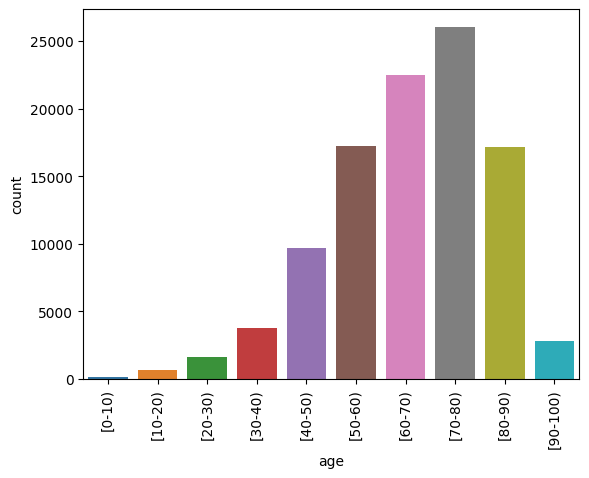

In [24]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

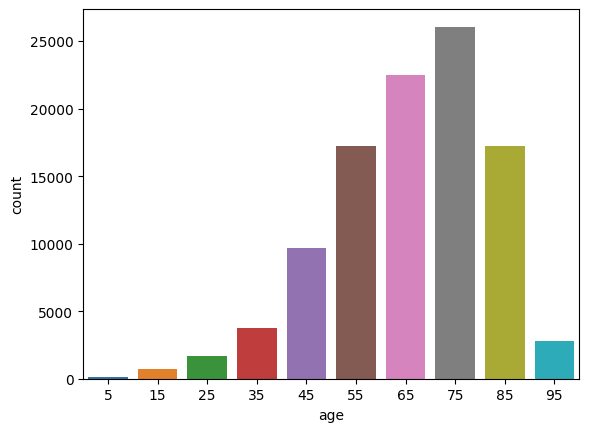

In [25]:
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = df)
plt.show()

Distribution of ID's
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


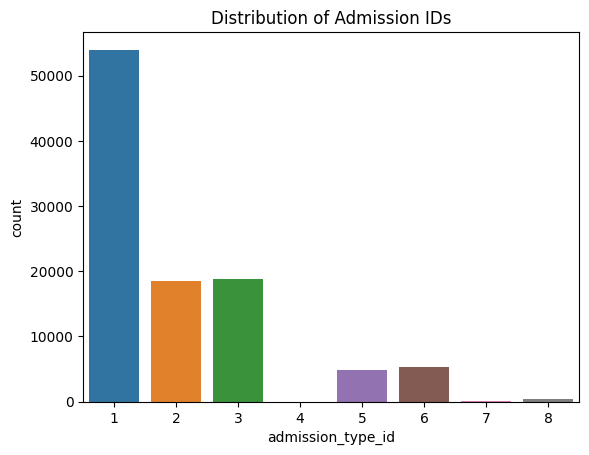

In [26]:
print("Distribution of ID's")
print(df.admission_type_id.value_counts())

sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

-Distribution of ID's-
Emergency        82864
Elective         18868
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


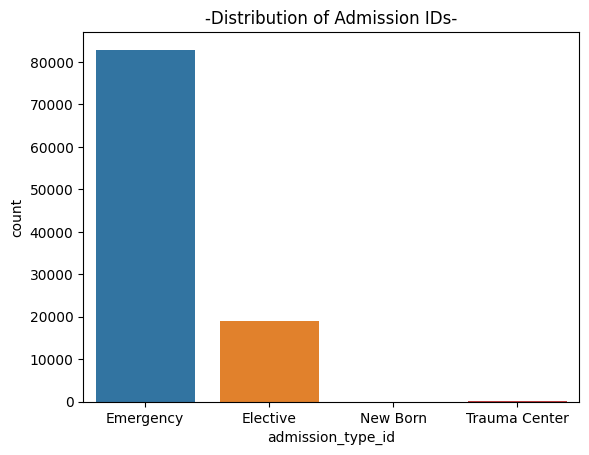

In [66]:
# Create a mapping of admission type IDs to their corresponding categories
mapped = {
    1.0: "Emergency",
    2.0: "Emergency",
    3.0: "Elective",
    4.0: "New Born",
    5.0: np.nan,
    6.0: np.nan,
    7.0: "Trauma Center",
    8.0: np.nan
}

# Replace admission_type_id values with their mapped categories
df.admission_type_id = df.admission_type_id.replace(mapped)

# Print the distribution of admission type categories
print("-Distribution of ID's-")
print(df.admission_type_id.value_counts())

# Create a countplot to visualize the distribution of admission type categories
sns.countplot(x="admission_type_id", data=df)
plt.title("-Distribution of Admission IDs-")
plt.show()


In [28]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(mapped_discharge)

In [29]:
df['discharge_disposition_id'].unique()

array([nan, 'Discharged to Home', 'Other'], dtype=object)

Proportions of ID's
Discharged to Home    73649
Other                 23434
Name: discharge_disposition_id, dtype: int64


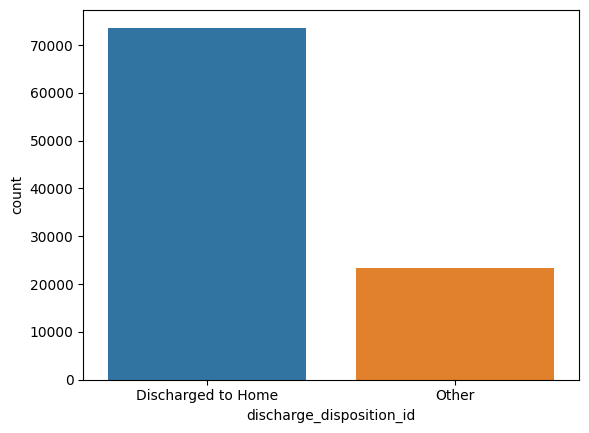

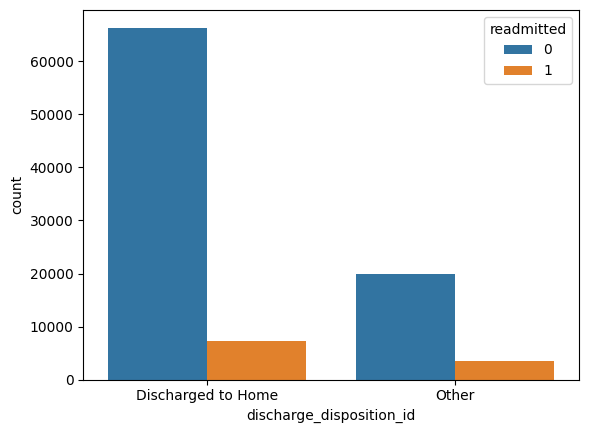

In [30]:
print("Proportions of ID's")
print(df.discharge_disposition_id.value_counts())

sns.countplot(x ="discharge_disposition_id", data = df)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = df)
plt.show()

Emergency    64434
Referral     30855
Other         6474
Name: admission_source_id, dtype: int64


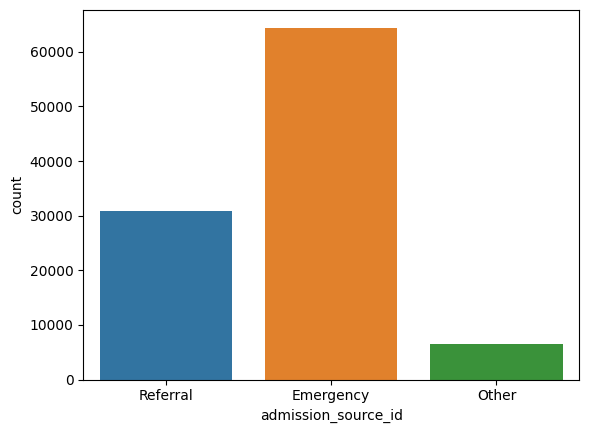

In [57]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
df.admission_source_id = df.admission_source_id.replace(mapped_adm)
print(df.admission_source_id.value_counts())

sns.countplot(x = "admission_source_id", data = df)
plt.show()



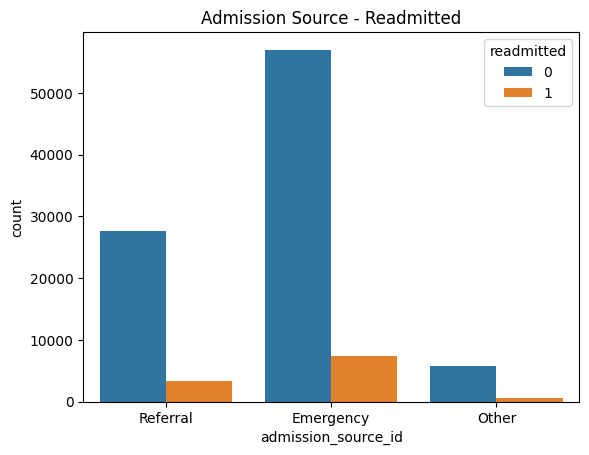

In [58]:
sns.countplot(x = "admission_source_id", hue = "readmitted", data = df)
plt.title("Admission Source - Readmitted")
plt.show()

3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64


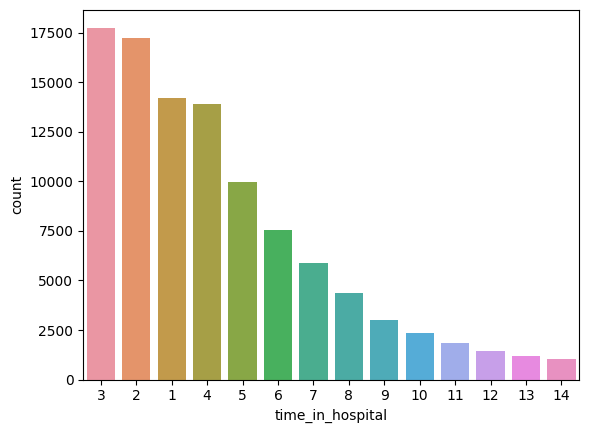

In [32]:
print(df.time_in_hospital.value_counts())

sns.countplot(x="time_in_hospital", data = df,
              order = df.time_in_hospital.value_counts().index)
plt.show()

In [33]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

df['admission_type_id'] = df['admission_type_id'].fillna(df['admission_type_id'].mode()[0])

df['discharge_disposition_id'] = df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].mode()[0])

df['admission_source_id'] = df['admission_source_id'].fillna(df['admission_source_id'].mode()[0])

In [34]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [35]:
cat_data = df.select_dtypes('O')
num_data = df.select_dtypes(np.number)

cat_data

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,Emergency,Discharged to Home,Referral,250.83,NaN,NaN,None,None,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,Emergency,Discharged to Home,Emergency,276,250.01,255,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,Emergency,Discharged to Home,Emergency,648,250,V27,None,None,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,Emergency,Discharged to Home,Emergency,8,250.43,403,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,Emergency,Discharged to Home,Emergency,197,157,250,None,None,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Other,Emergency,250.13,291,458,None,>8,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,Emergency,Other,Other,560,276,787,None,None,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,Emergency,Discharged to Home,Emergency,38,590,296,None,None,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,Emergency,Other,Emergency,996,285,998,None,None,...,No,No,Up,No,No,No,No,No,Ch,Yes


#Model Creation and Evaluation

In [36]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
LE = LabelEncoder()

# Iterate through each column of categorical data in the DataFrame
for i in cat_data:
    # Use the LabelEncoder to transform the values in the column to numerical labels
    cat_data[i] = LE.fit_transform(cat_data[i])


In [37]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()
data['glipizide'].unique()

array([1, 2, 3, 0])

In [38]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,0,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,1,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,0,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,0,1


In [39]:
X = data.drop('readmitted',axis=1)

y = data['readmitted']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [41]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)

X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((81410, 44), (20353, 44), (81410,), (20353,))

#Logistic Regression-
Logistic Regression is a simple yet effective linear classification algorithm used for binary and multi-class classification. It models the probability of a data point belonging to a particular class using the logistic function, making it suitable for interpreting the impact of features on the outcome.

In [43]:
LR = LogisticRegression()

LR.fit(X_train_scaled,y_train)

LR.score(X_train_scaled,y_train)

0.8881464193588011

In [44]:
LR.score(X_test_scaled,y_test)

0.8883211320198496

#Random Forest
Random Forest is an ensemble learning method that builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting. It is robust, handles high-dimensional data well, and can be used for classification and regression tasks.

In [45]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RF.score(X_train_scaled,y_train)

0.9999877164967449

In [46]:
RF.score(X_test_scaled,y_test)

0.8888124600795951

In [47]:
y_pred = RF.predict(X_test)

In [48]:
confusion_matrix(y_test,y_pred)

array([[17626,   474],
       [ 2132,   121]])

In [49]:
accuracy_score(y_test,y_pred)

0.8719599076303247

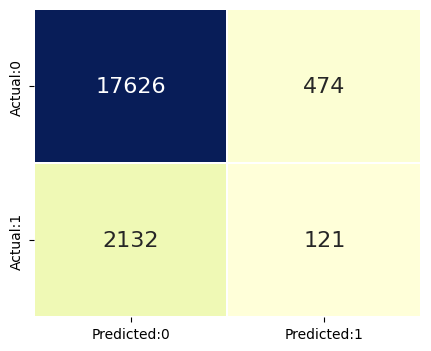

In [59]:
# Set the figure size for the heatmap
plt.figure(figsize=(5, 4))

# Calculate the confusion matrix based on actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix with labels
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Create a heatmap to visualize the confusion matrix with green color
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=0.1, annot_kws={'size': 16})

# Customize the appearance of the heatmap
plt.xticks(fontsize=10)  # Set x-axis label font size
plt.yticks(fontsize=10)  # Set y-axis label font size

# Display the heatmap
plt.show()


#AdaBoost Classifier-
AdaBoost is a boosting algorithm that can be effective for classification tasks, particularly when used with weak learners.

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create an AdaBoost Classifier instance
AdaBoost = AdaBoostClassifier()

# Fit the model to the training data
AdaBoost.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = AdaBoost.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18100
           1       0.46      0.02      0.03      2253

    accuracy                           0.89     20353
   macro avg       0.68      0.51      0.49     20353
weighted avg       0.84      0.89      0.84     20353



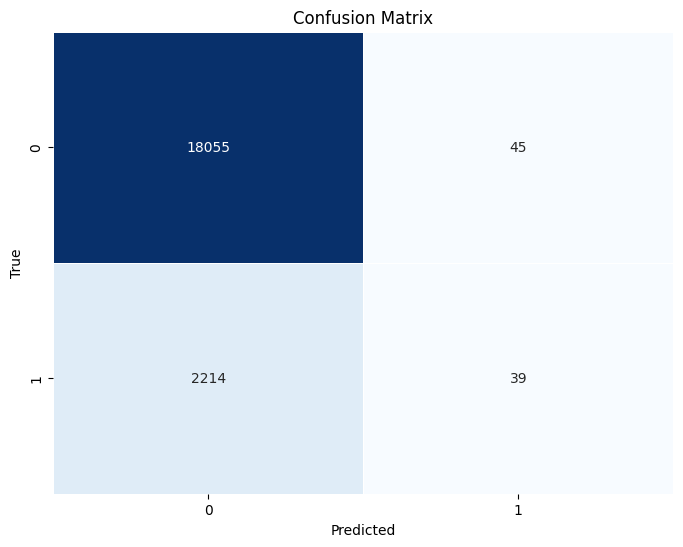

In [65]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()